# Rotating

## Introduction

In image processing we often have to rotate images for various reasons, such as adjusting an image's orientation and/or creating variations of the image. In deep learning, we can rotate images help us to augment and enrich the image datasets so that the same image sample would have slight variations while retaining the essence and the pattern of the class, potentially helping the algorithm to generalize and learn a more robust representation of an object.

VisuMorph's `rotate` function is designed with this in mind. Beside simple rotation of an image, it can also fill the background of the rotated image so that we can avoid filling our image with unwanted empty spaces. SciPy and PIL do not offer this feature.


## Importing libraries
Import the necessary libraries, including `rotate`, `load_image`.

In [11]:
from visumorph import rotate, load_image, Image
import numpy as np
from PIL import Image as PImage
from IPython.display import display

## Loading the Image
First, we load our sample image for using `visumorph.load_image` function:

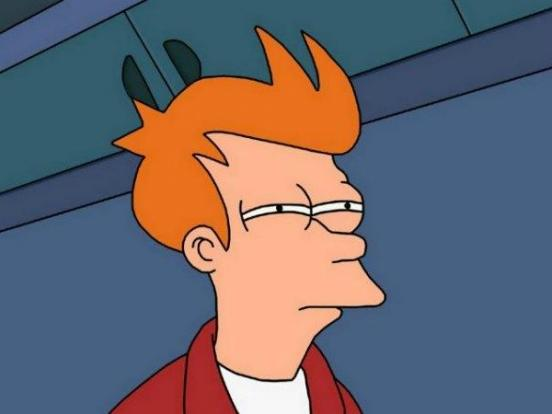

In [4]:
img = load_image("../tests/img/raw/meme.jpg")
meme = PImage.fromarray(img.image)
display(meme)

## Simple rotation

Once loaded the image as a `Image` object, we can apply `rotate` on it. 

Please note that the rotation should be supplied in degree, and a positive 
number means clockwise rotation and a negative number means anti-clockwise 
rotation. This behaviour is different from the popular implementations such 
as SciPy and PIL.

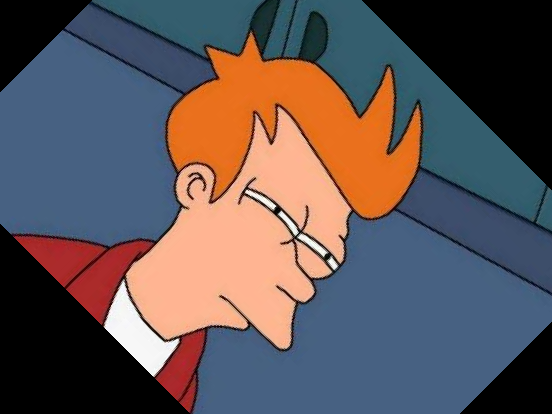

In [8]:
# simple rotation, 45 degrees clockwise
rotated_45 = rotate(img, 45)

rotated_45 = PImage.fromarray(rotated_45.image)
display(rotated_45)

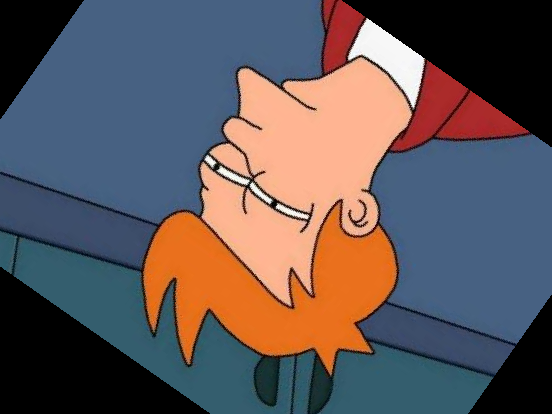

In [9]:
# simple rotation, 145 degrees anti-clockwise
rotated_neg_145 = rotate(img, -145)

rotated_neg_145 = PImage.fromarray(rotated_neg_145.image)
display(rotated_neg_145)

## Rotation with a Background

As you might have noticed that in the previous example there are some black 
spaces around the corners in the rotated image. This is expected behaviour as
 depending on the degree of rotation, the rotated image might not be able to 
 cover all the pixels in the original dimension. By default, `rotate` will 
 fill these empty spaces with black pixels as shown above.
 
To do this, you can provide a `background` argument to the `rotate` function. Let's say we want to fill our corners with white background:

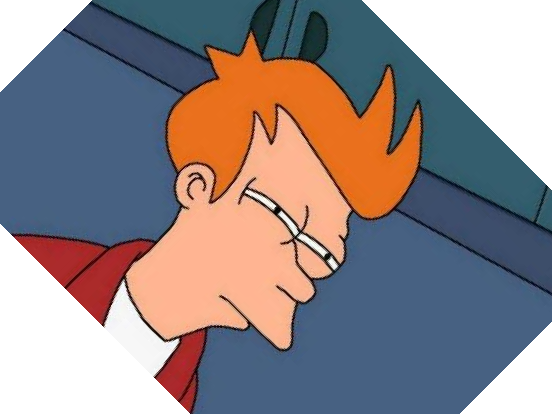

In [19]:
# using a white pixel as background
white_pixel = Image(np.array([255, 255, 255]).reshape((1, 1, 3)).astype(np.uint8))

# rotate the image with 45 degrees with the white pixel
rotated_with_bg = rotate(img, 45, background=white_pixel)

rotated_with_bg = PImage.fromarray(rotated_with_bg.image)
display(rotated_with_bg)

Additionally, since this function accepts VisuMorph's `Image` as background, we can also specify an image instead of simply a colored pixel.

If the image is not large 
enough for filling the entire image dimension, `rotate` will tile the image 
in order to expand the background image until it is able to fill up the 
entire range of the original image's dimension:

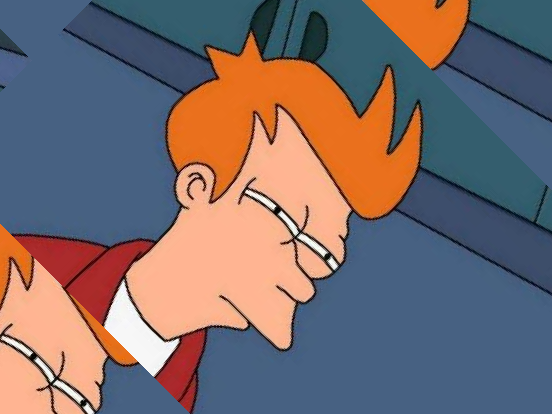

In [20]:
# using an image as the background
background = img

# rotate the image with 45 degrees with the background
rotated_with_bg = rotate(img, 45, background=background)

rotated_with_bg = PImage.fromarray(rotated_with_bg.image)
display(rotated_with_bg)

By combining different functions in VisuMorph, you can get interesting backgrounds:

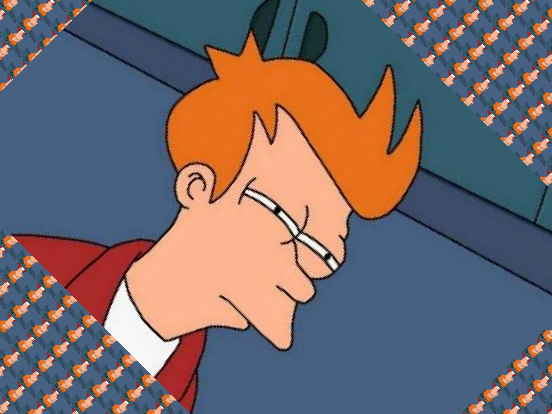

In [25]:
from visumorph import scale, flip
# using a transformed image as the background
background = flip(scale(img, 0.05), v=1)

# rotate the image with 45 degrees with the background
rotated_with_bg = rotate(img, 45, background=background)

rotated_with_bg = PImage.fromarray(rotated_with_bg.image)
display(rotated_with_bg)